In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
# Test signal generator

def signal(A, t):
    return A * np.sin(30*t) * np.exp(-t) + np.random.randn(t.shape[0])/2

In [149]:
A1 = 3
t1 = np.linspace(0, 5, 40000)
s1 = signal(A1, t1)

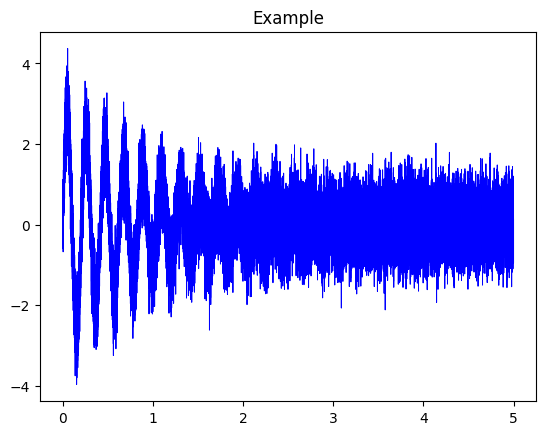

In [159]:
def plot(x, y, title):
    plt.figure()
    plt.plot(x, y, linewidth=0.7, c='blue')
    plt.title(title)
    plt.savefig(title + '.png')
    plt.show()

plot(t1, s1, 'Example')

In [152]:
def data_generator(n_samples):
    data = np.empty([n_samples, 40000])
    for i in range(n_samples):
        data[i] = signal(A1, t1)

    return data

data = data_generator(200)

# normalise
data = data / np.max(data)

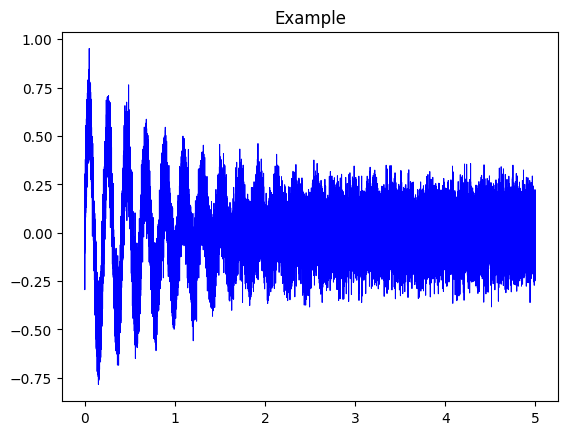

In [153]:
plot(t1, data[10], 'Example')

In [155]:
# Define the input shape
input_shape = (40000,)

# Build the encoder
def build_encoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    encoded = layers.Dense(256, activation='relu')(inputs)  
    encoded = layers.Dense(128, activation='relu')(encoded)  
    encoded = layers.Dense(64, activation='relu')(encoded)  
    return models.Model(inputs, encoded)

# Build the decoder
def build_decoder():
    encoded_inputs = layers.Input(shape=(64,))
    decoded = layers.Dense(128, activation='relu')(encoded_inputs)
    decoded = layers.Dense(256, activation='relu')(decoded)
    decoded = layers.Dense(40000, activation='linear')(decoded) 
    return models.Model(encoded_inputs, decoded)

# Build the autoencoder
def build_autoencoder(input_shape):
    encoder = build_encoder(input_shape)
    decoder = build_decoder()
    
    autoencoder_input = layers.Input(shape=input_shape)
    encoded = encoder(autoencoder_input)
    reconstructed = decoder(encoded)
    
    autoencoder = models.Model(autoencoder_input, reconstructed)
    return autoencoder

# Create the autoencoder
autoencoder = build_autoencoder(input_shape)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Display architecture
autoencoder.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_29 (Functional)      │ (None, 64)             │    10,281,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_30 (Functional)      │ (None, 40000)          │    10,321,344 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,602,752 (78.59 MB)

 Trainable params: 20,602,752 (78.59 MB)

 Non-trainable params: 0 (0.00 B)

In [156]:
autoencoder.fit(data, data, epochs=50, batch_size=50, validation_split=0.2)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - loss: 0.0311 - val_loss: 0.0214
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 0.0179 - val_loss: 0.0134
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.0134 - val_loss: 0.0125
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.0117 - val_loss: 0.0117
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 0.0115 - val_loss: 0.0115
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.0113 - val_lo

In [157]:
reconstructed = autoencoder.predict(data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


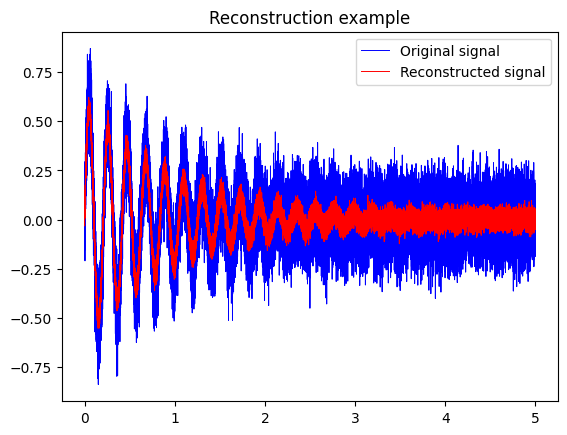

In [158]:
plt.figure()
plt.plot(t1, data[0], c='blue', label='Original signal', linewidth=0.7)
plt.plot(t1, reconstructed[0], c='red', label='Reconstructed signal', linewidth=0.7)
plt.legend(loc='best')
plt.title('Reconstruction example')
plt.savefig('Reconstruction_ex.png')
plt.show()